# Práctica 9: análisis de asociación

In [1]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [2]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

df = pd.DataFrame(dataset)
df

,0,1,2,3,4,5
0,Milk,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt
1,Dill,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt
2,Milk,Apple,Kidney Beans,Eggs,None,None
3,Milk,Unicorn,Corn,Kidney Beans,Yogurt,None
4,Corn,Onion,Onion,Kidney Beans,Ice cream,Eggs


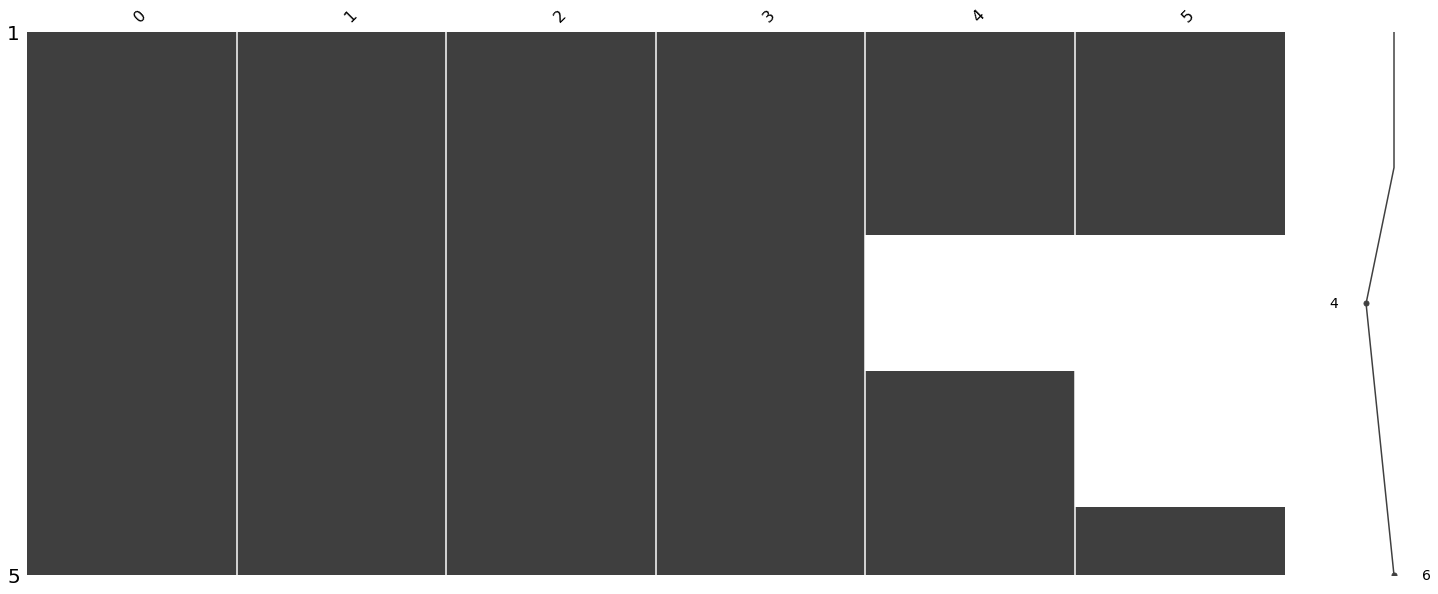

In [3]:
msno.matrix(df)

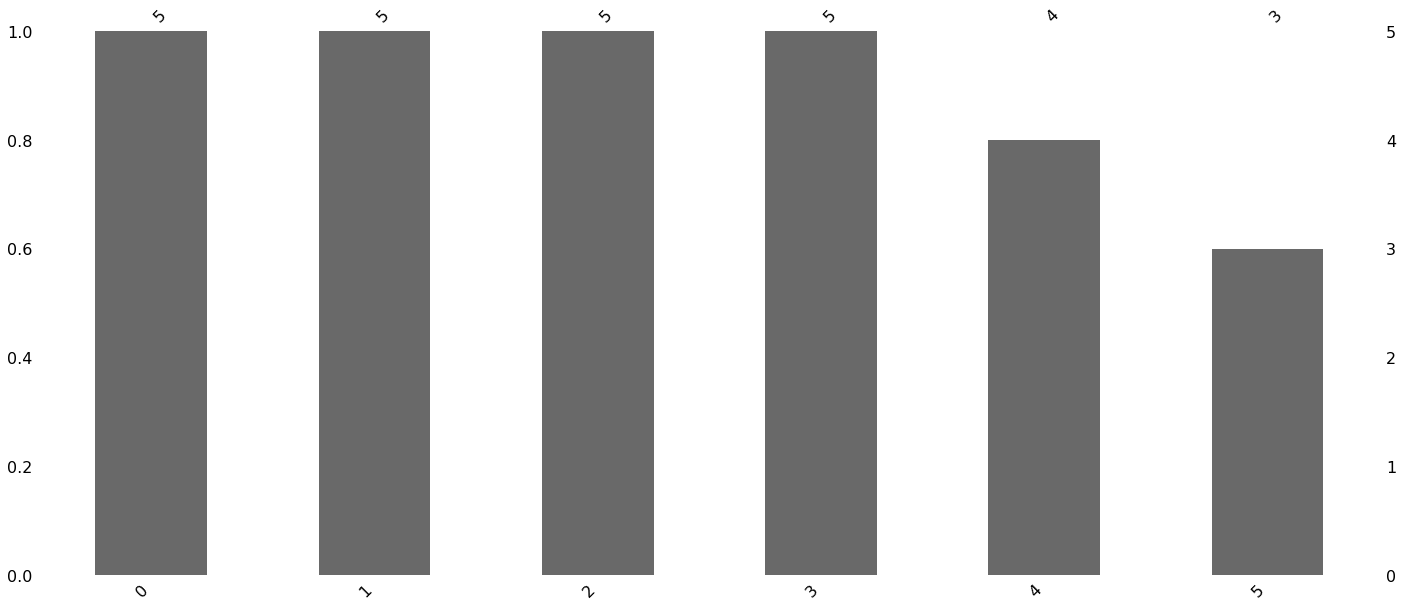

In [4]:
msno.bar(df)

Debemos observar cuáles elementos únicos hay realmente en la tabla.

In [5]:
items = (df[0].append(df[1]).append(df[2]).append(df[3]).append(df[4]).append(df[5])).unique()
items

array(['Milk', 'Dill', 'Corn', 'Onion', 'Apple', 'Unicorn', 'Nutmeg',
       'Kidney Beans', 'Eggs', None, 'Yogurt', 'Ice cream'], dtype=object)

In [6]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [7]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Corn,Ice cream,NaN,Apple,Unicorn,Dill,Kidney Beans,Yogurt,Nutmeg,Milk,Eggs,Onion
0,0,0,0,0,0,0,1,1,1,1,1,1
1,0,0,0,0,0,1,1,1,1,0,1,1
2,0,0,1,1,0,0,1,0,0,1,1,0
3,1,0,1,0,1,0,1,1,0,1,0,0
4,1,1,0,0,0,0,1,0,0,0,1,1


In [8]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### Aplicando Apriori
Las reglas de asociación encuentran todos los conjuntos de artículos (itemsets) que tienen un soporte mayor que el soporte mínimo (umbral); entonces las reglas deseadas deben tener una confianza mayor que la confianza mínima. El levantamiento de una regla es la relación entre el soporte observado y el esperado si X e Y fueran independientes.

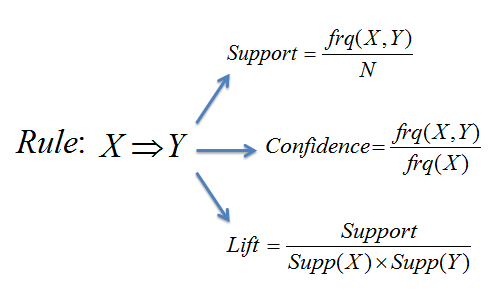

La salida es un dataframe con el soporte de cada conjunto de elementos.

In [9]:
freq_items = apriori(ohe_df, min_support=0.6, use_colnames=True, verbose=1)
freq_items.head()

Processing 18 combinations | Sampling itemset size 3


,support,itemsets
0,1.0,(Kidney Beans)
1,0.6,(Yogurt)
2,0.6,(Milk)
3,0.8,(Eggs)
4,0.6,(Onion)


In [10]:
freq_items.itemsets.unique()

array([frozenset({'Kidney Beans'}), frozenset({'Yogurt'}),
       frozenset({'Milk'}), frozenset({'Eggs'}), frozenset({'Onion'}),
       frozenset({'Kidney Beans', 'Yogurt'}),
       frozenset({'Kidney Beans', 'Milk'}),
       frozenset({'Kidney Beans', 'Eggs'}),
       frozenset({'Kidney Beans', 'Onion'}), frozenset({'Eggs', 'Onion'}),
       frozenset({'Kidney Beans', 'Eggs', 'Onion'})], dtype=object)

### Reglas de la Asociación
Las reglas de asociación consisten en un antecedente (if) y un consecuente (then). La medida de estas reglas de asociación pueden ser confidence, lift, support, leverage y conviction.

association_rules(df, metric'confidence', min_threshold=0.8, support_only=False)

El resultado del análisis de la asociación muestra qué artículo se compra con frecuencia con otros artículos.

In [12]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0
1,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
2,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0
3,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
4,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
5,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
